# $$Data Mining HW1$$

### <div style="text-align: right"> 201822037 통계학과 한민주 </div>

**Exercises for Linear Regression**

#### 1. 설명변수가 1개(X)이고, 반응변수가 1개(Y )인데이터를 가지고 있다고 하자. (n = 100) 그리고 다음의 두 모형(linear regression, cubic regression)을 적합시키려고 한다.


(1) $$ Y = \beta_0 + \beta_1X + ϵ $$
(2) $$ Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon $$

`(a)` 실제 X, Y 가 선형(linear)관계가 있다고 가정 하자. 모델 (1),(2)의 SSE(잔차제곱합)의 크기를 비교할 수 있는지 설명하여라.

- 모델 (1),(2)의 SSE의 크기를 비교할 수 없다. 왜냐하면 SSE는 새로운 설명변수(새로운 항)가 추가되면 무조건 감소하는 값이기 때문이다. 실제 X,Y가 선형관계에 있더라도 설명변수가 많은 모델(2)의 SSE가 더 작게 나올 것이다. 따라서 두 모델을 MSE를 비교해야 한다. 또한 실제 X, Y 가 선형(linear)관계가 있다는 가정이 맞다면 모델 (2)의 $\hat{\beta_2} , \hat{\beta_3}$가 유의하지 않다는 결과가 나올 것으로 예측된다. 

`(b)` 실제 X, Y 가 비선형(non-linear)관계가 있다고 가정 하자. 대신 실제 모형에 대한 정보는 없다. 모델 (1),(2)의 SSE(잔차제곱합)의 크기를 비교할 수 있는지 설명하여라.

- 모델 (1),(2)의 SSE의 크기를 비교할 수 없다. 왜냐하면 SSE는 새로운 설명변수(새로운 항)가 추가되면 무조건 감소하는 값이기 때문이다. 따라서, 실제 모형이 어떻든지 모델(2)의 SSE가 무조건 더 작게 나올 것이다. 이 경우엔 모델(1)과 모델(2)의 MSE를 비교하여서 MSE가 더 작게 나온 모델을 선택하든지, 모델(2)의 변수 선택을 하여 최적의 모델을 적합해야한다. 

#### 2. `Auto.csv` 데이터를 이용하여 `단순 선형 회귀 모형`을 적합한다. 

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [57]:
Auto.df = read.csv("Auto.csv", stringsAsFactors = F)  # data 불러오기
Auto.df %>% head

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


- 회귀모형으로 적합해야 하는 `horsepower` 변수의 자료형이 character이다.

In [58]:
Auto.df$horsepower=as.numeric(Auto.df$horsepower) # 문자형 변수에서 수치형 변수로 강제 변환 해준다.

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"


In [59]:
Auto.df %>% slice(30 :35)  # 기존의 ? 이었던 값은 NA로 변환되었다.

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
27,4,97,88,2130,14.5,71,3,datsun pl510
28,4,140,90,2264,15.5,71,1,chevrolet vega 2300
25,4,113,95,2228,14.0,71,3,toyota corona
25,4,98,NA,2046,19.0,71,1,ford pinto
19,6,232,100,2634,13.0,71,1,amc gremlin
16,6,225,105,3439,15.5,71,1,plymouth satellite custom


In [60]:
Auto.df = Auto.df[!is.na(Auto.df$horsepower),] # NA 제거

In [61]:
Auto.df %>% slice(30 :35) # 결측지가 제거되었다.

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>
27,4,97,88,2130,14.5,71,3,datsun pl510
28,4,140,90,2264,15.5,71,1,chevrolet vega 2300
25,4,113,95,2228,14.0,71,3,toyota corona
19,6,232,100,2634,13.0,71,1,amc gremlin
16,6,225,105,3439,15.5,71,1,plymouth satellite custom
17,6,250,100,3329,15.5,71,1,chevrolet chevelle malibu


`(a)` 반응변수 mpg, 설명변수는 horsepower로 하는 단순선형회귀모형을 적합 시킨 후 summary() 함수의 결과 확인하고 다음의 물음에 답하여라.

$$ mpg = \beta_0 + \beta_1 \times horsepower $$

In [62]:
model=lm(mpg ~ horsepower, data=Auto.df) # 단순 선형 회귀 모형 적합

In [63]:
model %>% summary


Call:
lm(formula = mpg ~ horsepower, data = Auto.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


- `i`  두 변수 사이에 관계가 있는가?

 회귀식 $mpg = \beta_0 + horsepower*\beta_1$에서 회귀식의 유의성 판단을 위해 F-통계량을 확인하였더니 599.7, 유의확률은 2.2e-16으로 유의수준 0.05 하에서 회귀식이 유의하다. 회귀계수의 유의성 판단을 해보면, $\hat{\beta_0}$의 t-통계량은 55.66 , 유의수준은 2e-16로 매우 낮고, $\hat{\beta_1}$의 t-통계량은 -24.49 , 유의확률은 2e-16 매우 낮다. 따라서 $\hat{\beta_0}$ 와$\hat{\beta_1}$의 각 유의성 검정에서 영가설이 기각되어 회귀계수가 유의함으로 판단된다. 즉, 회귀계수와 회귀식 모두 유의하므로 두 변수 mpg , hosepower 사이에 선형의 어떤 관계가 있다. 

- `ii` 두 변수 사이의 관계는 얼마나 강한가?

$R^2$이 0.6059인 것으로 보아 horsepower는 mpg의 변동을 약 60% 설명한다. 이는 아주 크진 않지만 상당한 만큼 두 변수 사이에 관계가 있다고 판단된다.

- `iii` 두 변수는 음의 관계가 있는가? 양의 관계가 있는가?

$\hat{\beta_1}$의 추정치가 -0.157845인 것으로 보아, horsepower가 한 단위 증가할 때마다 mpg는 0.157845만큼 감소한다. 따라서 두 변수는 음의 관계가 있다.

- `iv` horsepower의 값이 98일 때, mpg의 예측값은 무엇인가 95% 신뢰구간은 무엇인가?

 $$mpg = \beta_0 + horsepower \times \beta_1$$

In [64]:
predict(model, newdata=data.frame(horsepower=98), interval="prediction")

,fit,lwr,upr
1,24.46708,14.8094,34.12476


- horsepower = 98 일 때, mpg 예측값은 24.46708이며 95% 예측 신뢰구간은 (14.8094 , 34.12476)이다.

`(b)` 설명변수와 반응변수의 산점도를 그리고, 회귀직선을 추가하여라. (abline() 사용)

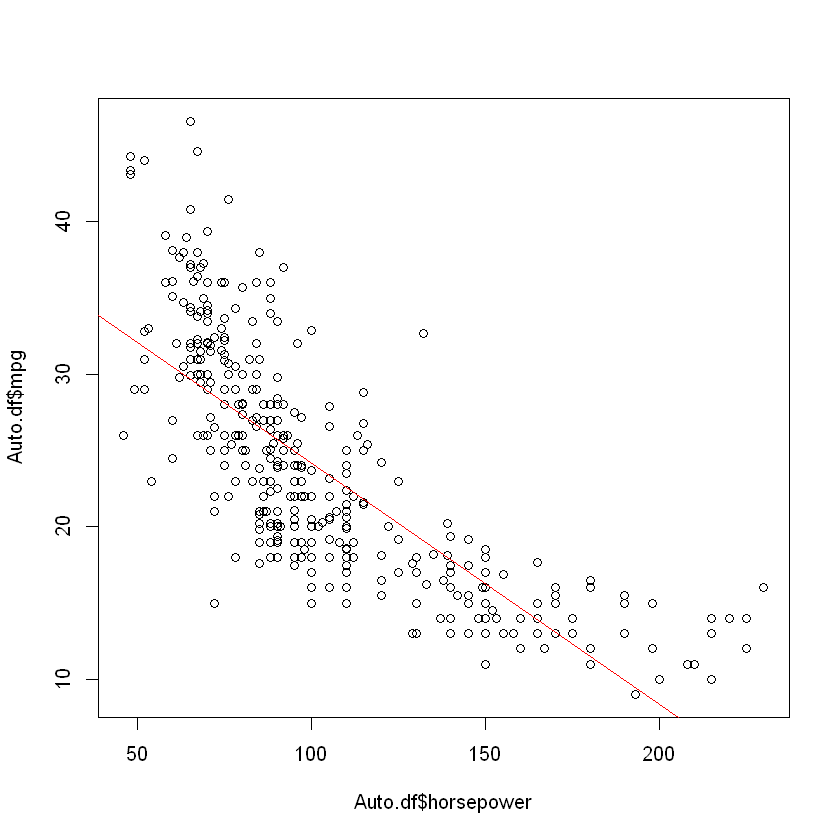

In [65]:
plot(Auto.df$horsepower , Auto.df$mpg)
abline(model,col="red")

#### 3. 이 문제는 다중공선성(collinearity)에 관련한 것이다.

`(a)` R에 다음의 명령문을 실행하여라. 마지막 줄이 두개의 설명변수를 이용한 중회귀모형이다. 회귀모형을 쓰시오. (β 등을 이용하여)

In [66]:
set.seed(1)
x1 = runif(100)
x2 = 0.5*x1 + rnorm(100)/10
y = 2 + 2*x1 + 0.3*x2 +rnorm(100)

$$ y = \beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2 + \epsilon$$

`(b)` 두 설명변수 x1과 x2 사이에 상관관계(correlation)이 있는가? 산점도를 그려서 확인하여라

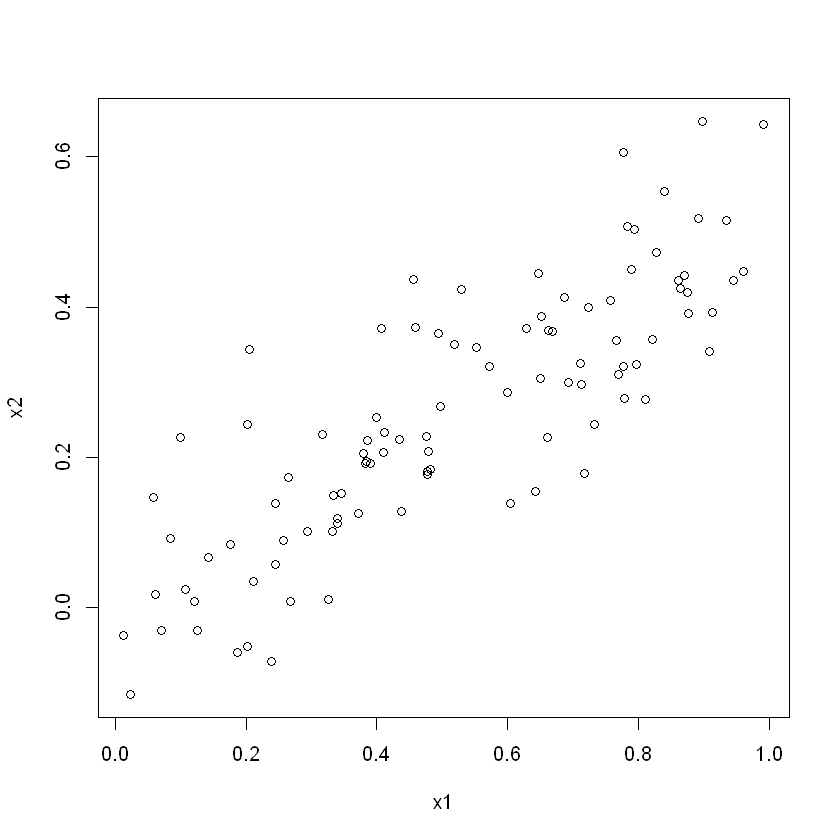

In [67]:
plot(x1,x2)

In [68]:
cor(x1,x2)

[1] 0.8351212

- x1이 증가함에 따라 x2도 증가하는 경향이 있다. 두 설명 변수 x1 , x2 사이에 양의 상관관계가 있어 보인다. 실제로 x1과 x2의 상관계수를 구해보니 0.83으로 높은 양의 상관관계가 있었다.

`(c)` 생성된 데이터를 이용하여 (a) 모형의 회귀계수를 추정하여라. 실제 회귀계수와 추정된 회귀계수와
비교하여라. H0 : β1 = 0을 기각할 수 있는가? H0 : β2 = 0을 기각할 수 있는가?

In [12]:
model1 = lm(y~x1+x2)

In [13]:
summary(model1)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


- 실제 회귀계수는 $\beta_0 =2 , \beta_1=2 , \beta_2 = 0.3$인데, 추정된 회귀계수는 $\hat{\beta_0}=2.1305, \hat{\beta_1}= 1.4396 , \hat{\beta_2}= 1.0097$이다. $\hat{\beta_0}$는 비교적 잘 추정된 것 같지만, $\hat{\beta_1}$ 와 $\hat{\beta_2}$는 잘못 추정된 것 같다.

- 회귀계수 $\hat{\beta_1}$의 유의성을 판단해 보자면 t-통계량은 1.996, 유의확률은 0.0487이므로 유의수준 0.05 하에서 $H_0 : \beta_1 = 0$ 을 기각할 수 있어, 회귀계수가 유의하다고 판단된다. 반면 회귀계수 $\hat{\beta_2}$의 유의성을 판단해 보자면 t-통계량은 0.891, 유의확률은 0.3754이므로 유의수준 0.05 하에서 $H_0 : \beta_2 = 0$ 을 기각할 수 없어, 회귀계수가 유의하지 않다고 판단된다.

`(d)` 이번에는 x1만을 이용한 단순선형회귀 모형을 적합하여라. 결과를 분석하여라. H0 : β1 = 0을 기각할
수 있는가?

$$ y = \beta_0 + \beta_1 \times x_1 $$

In [14]:
model2 = lm(y~x1)

In [15]:
summary(model2)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


- 실제 회귀계수는 $\beta_0 =2 , \beta_1=2$ 인데, 추정된 회귀계수는 $\hat{\beta_0}=2.1124, \hat{\beta_1}= 1.9759$ 이므로 잘 추정된 것 같다. 그러나 $R^2=0.2024$ 로 회귀계수가 실제값과 비슷하게 추정된 것에 비해 y의 변동에 대한 x1의 설명력이 상당히 낮은데, 이는 x2가 y의 변동에 고려되지 않았기 때문이다.

- $\hat{\beta_1}$ 의 유의성을 판단해 보자면 t-통계량이 4.986 , 유의확률이 2.66e-06 이므로 유의수준 0.05 하에서 $H_0 : \beta_1 =0$을 기각할 수 있어, 회귀계수가 유의하다고 판단된다.

- 또한 F-통계량이 24.68 , 유의확률이 2.661e-06 이므로 유의수준 0.05 하에서 $H_0 : \beta_0 = \beta_1 = 0$ 을 기각할 수 있어, 회귀식이 유의하다고 판단된다.

`(e)` 이번에는 x2만을 이용한 단순선형회귀 모형을 적합하여라. 결과를 분석하여라. H0 : β2 = 0을 기각할
수 있는가?

$$ y = \beta_0 + \beta_2 \times x_2 $$

In [69]:
model3 = lm(y~x2)

In [70]:
summary(model3)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


- 실제 회귀계수는 $\beta_0 =2 , \beta_2=0.3$ 인데, 추정된 회귀계수는 $\hat{\beta_0}=2.3899, \hat{\beta_2}= 2.8996$ 이므로 $\hat{\beta_0}$는 비교적 잘 추정되었지만 $\hat{\beta_2}$는 전혀 다른 값으로 추정되었다. 또한$R^2=0.1763$ 으로 y의 변동에 대한 설명력이 지금까지의 모델 중 가장 낮은데, 이는 x1이 y의 변동의 설명에 포함되지 않았을 뿐더러, x2가 잘못 추정되었기 때문이라고 생각한다.

- $\hat{\beta_2}$ 의 유의성을 판단해 보자면 t-통계량이 4.58 , 유의확률이 1.37e-05 이므로 유의수준 0.05 하에서 $H_0 : \beta_2 =0$을 기각할 수 있어, 회귀계수가 유의하다고 판단된다.

- 또한 F-통계량이 20.98 , 유의확률이 1.366e-05 이므로 유의수준 0.05 하에서 $H_0 : \beta_0 = \beta_2 = 0$ 을 기각할 수 있어, 회귀식이 유의하다고 판단된다.

`(f)` (c)-(e)의 결과가 서로 모순되는가? 설명하여라.

- (c) 의 x1, x2를 모두 포함한 model1에서는 x1은 y의 변동에 약하지만 유의한 영향을 미치고, x2는 y의 변동에 유의한 영향을 미치지 않는다고 나온다. 하지만 (d) 의 x1만을 포함한 model2에서는 x1이 y의 변동에 아주 강한 영향을 미치며, (e) 의 x2만을 포함한 model3에서는 x2 역시 y의 변동에 아주 강한 영향을 미친다고 나온다. 따라서 (c)와 (d),(e)는 모순된 결과이다.

- 이는 설명변수인 x1과 x2가 서로 영향을 미치는 다중공선성의 문제 때문에 야기된 결과로 보인다.

`(g)` 새로운 데이터가 관측되었다고 하자.(이 데이터는 잘못 측정된 것이다.) 추가된 데이터를 이용하여 (c)-(e)를 다시 적합하여라. 결과가 어떻게 달라졌는가? 각 모형에서 새로운 데이터는 이상점인가?(잔차가 기존에 있는 데이터에 비해 많이 큰가?) 아니면 영향점인가?(추가된 데이터로 인해 회귀계수의 값이 많이 바뀌었는가?) 설명하여라.

In [18]:
x1= c(x1, 0.1)
x2= c(x2, 0.8)
y= c(y, 6)

In [19]:
model1 = lm(y~x1+x2)
model2 = lm(y~x1)
model3 = lm(y~x2)

In [20]:
summary(model1)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06


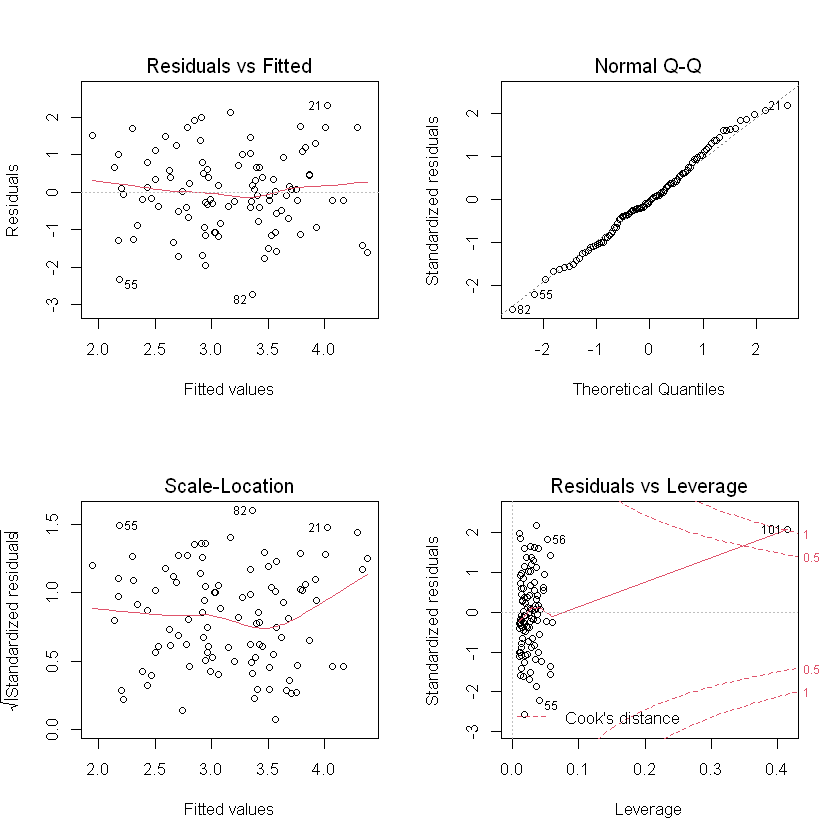

In [21]:
par(mfrow=c(2,2))
plot(model1)

- 추가된 데이터로 인해 회귀계수의 값이 많이 바뀌었고, 기존의 결과는 $\hat{\beta_1}$이 유의했는데, 이번의 결과로는 $\hat{\beta_2}$가 유의하다고 나온다. 따라서 추가된 데이터를 회귀계수에 큰 영향을 주는 영향점으로 판단하여 잔차 도표를 확인해보니, Leverage 도표에서 경계선 바깥에 추가된 101번째 데이터가 위치함을 알 수 있다.

In [22]:
summary(model2)


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05


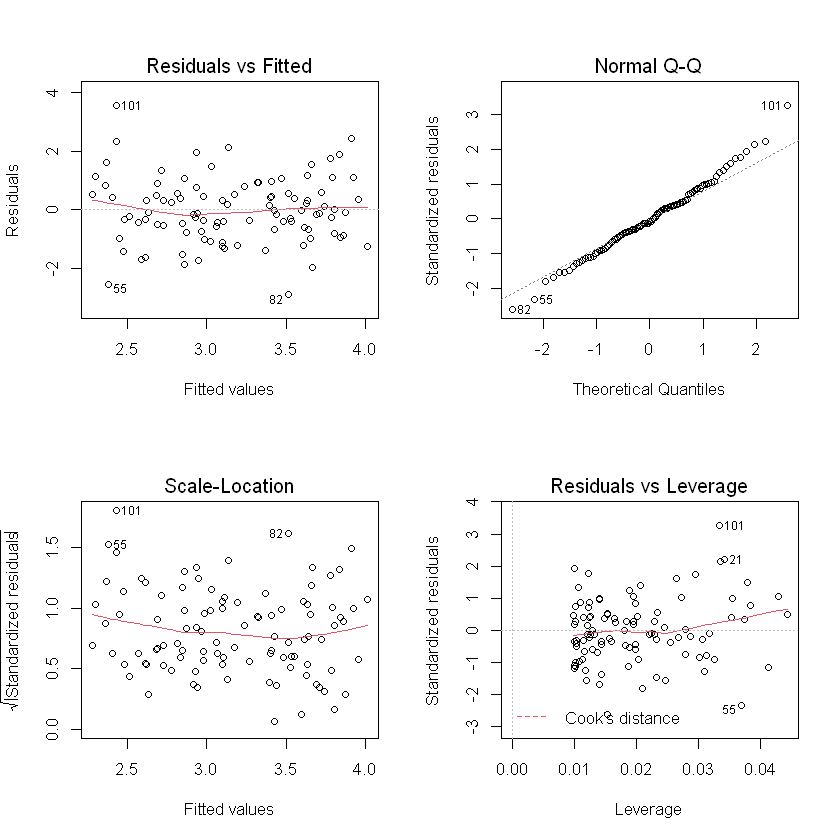

In [23]:
par(mfrow=c(2,2))
plot(model2)

- 기존의 모델과 새로운 데이터를 추가한 후 모델에서 회귀계수에 큰 변화는 없었지만, 잔차 도표를 그려보니 새로 추가된 101번째 데이터가 잔차가 눈에 띄게 큼이 확인된다. 또한 Q-Q plot에서 오른쪽 상단에 다른 데이터들과 동떨어져있는 101번째 데이터의 위치가 확인된다. 따라서 이 모델에서 새로 추가된 데이터는 이상점이다.

In [24]:
summary(model3)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


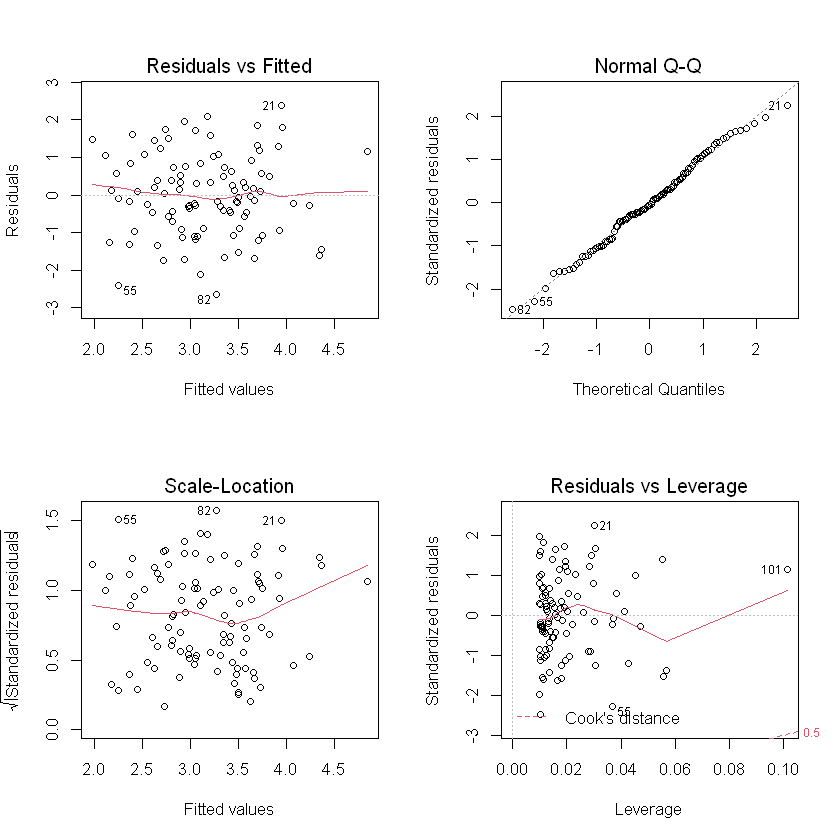

In [25]:
par(mfrow=c(2,2))
plot(model3)

- 기존의 모델과 새로운 데이터를 추가한 후 모델에서 회귀계수에 큰 변화가 없고, 잔차 도표의 Leverage도표에서 새로 추가된 101번째 데이터가 Cook's 경계선 안에 있으므로 영향점이 아니다. 잔차 도표를 봤을 때 101번째 데이터가 눈에 띄지도 않으므로 이 모델에서 새로 추가된 데이터는 이상점도 아니다.

**Exercises for Logistic Regression**

#### 1. 두개의 설명변수 (X1 = 공부시간, X2 = 학부평점)를 이용하여 A학점을 받을 확률을 예측하기 위해 로지스틱 회귀모형을 적합하였다. 추정된 회귀계수는 βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1이다.

$$ P(Y=1|X) = P(X) = \frac{e^{-6 + 0.05x_1 + x_2}}{1+e^{-6 + 0.05x_1 + x_2}}  $$

$$ \to log(\frac{P(X)}{1-P(X)}) = -6 + 0.05x_1 + x_2$$


`(a)` 40시간 공부하고, 평점이 3.5인 학생이 A를 받았을 확률을 예측하여라

In [26]:
x1=40 ; x2=3.5

In [27]:
exp(-6+0.05*x1+x2)/(1+exp(-6+0.05*x1+x2))

[1] 0.3775407

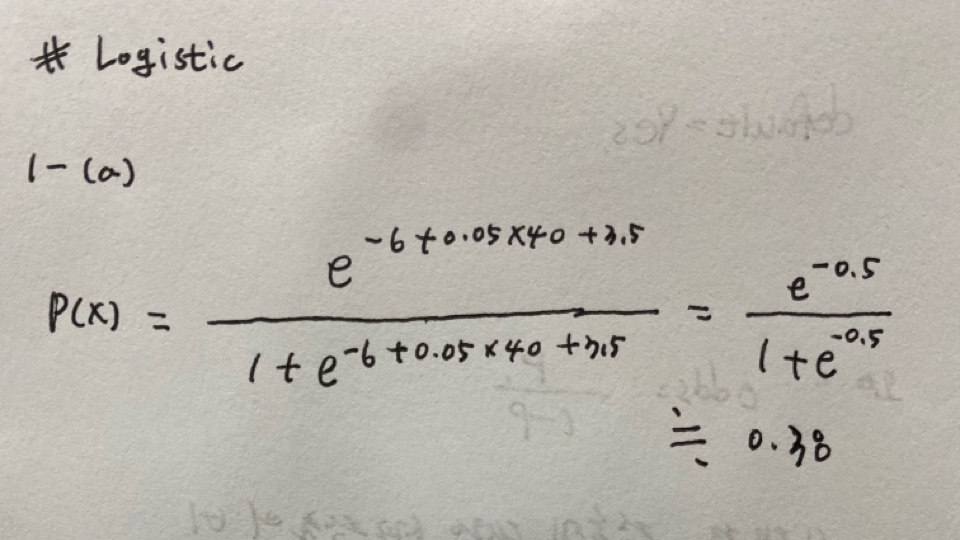

- 로지스틱 회귀모형 식에 x1 = 40, x2 = 3.5를 대입하면 된다. A를 받을 확률은 약 0.38이다. 

`(b)` 평점이 3.5인 학생은 얼마나 공부를 해야 A를 받을 확률이 50%를 넘을 것인가?

In [28]:
p=0.5 ; log(p/(1-p)) # Logit의 좌변

[1] 0

$$ 0 = -6 + 0.05x_1 + 3.5 $$ 

In [29]:
(6-3.5)/0.05

[1] 50

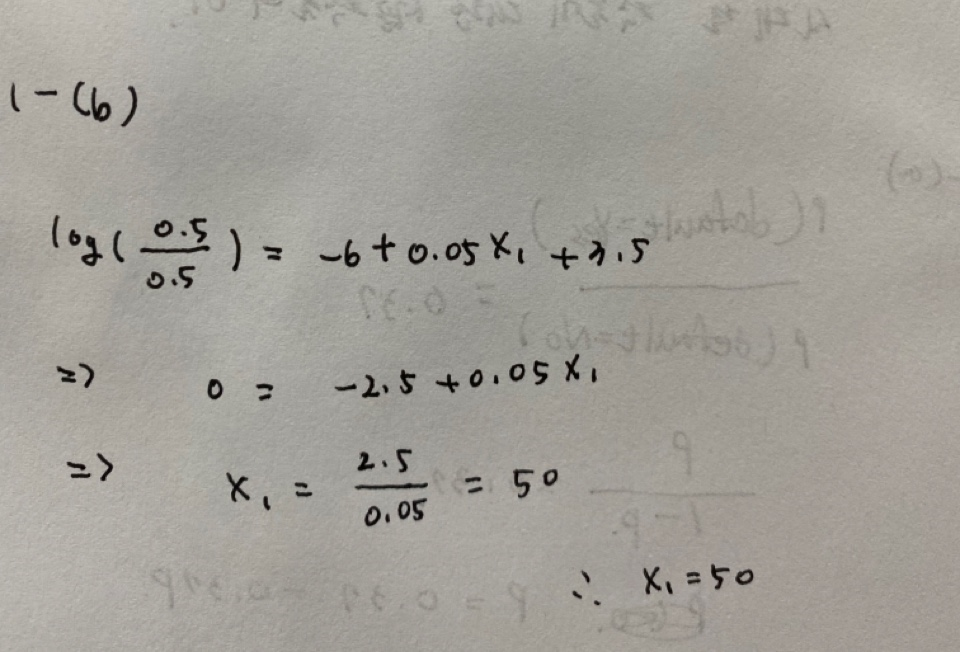

- Logit에 p=0.5 , x2 = 3.5를 대입하여 방정식을 풀면 된다. 평점이 3.5인 학생은 50시간을 공부해야 A를 받을 확률이 50%를 넘긴다.

#### 2. 다음은 odds에 관한 문제이다.

$$ odds = \frac{p}{1-p}$$ 

$\to$ 실패할 확률에 대한 성공 확률의 비 

`(a)` 신용카드결재 문제에서 결재를 하지 못하는 경우(default)에 대한 odds가 0.37인 사람들이 실제로 defalut할 확률은 평균적으로 얼마인가?

In [30]:
0.37/1.37

[1] 0.270073

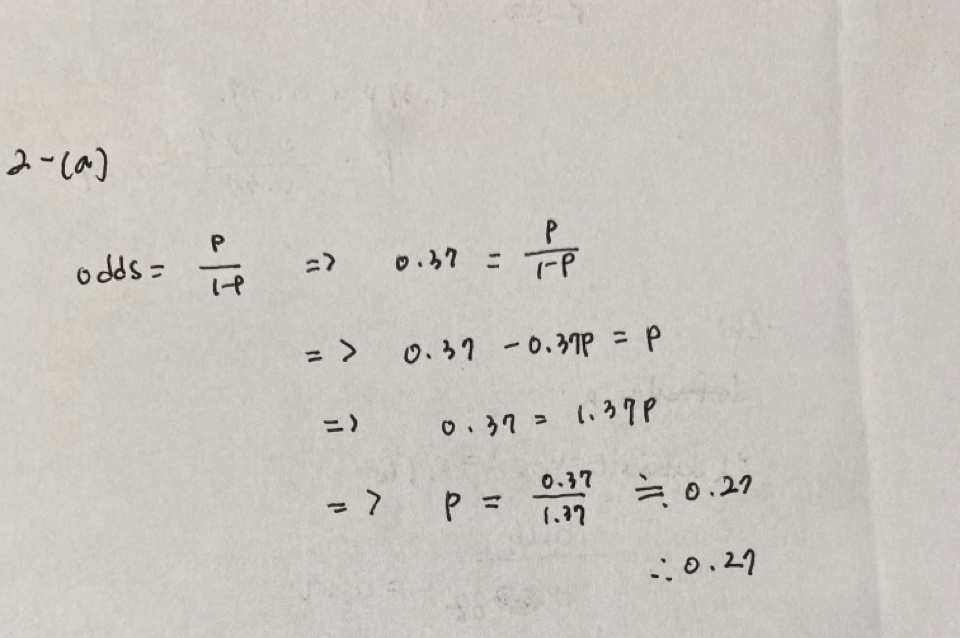

- odds 식에서 odds 값에 0.37을 대입하여 방정식을 풀면된다. odds가 0.37인 사람들이 실제로 defalut할 확률은 평균적으로 0.27이다.

`(b)` 어떤 개인이 default할 확률이 16% 라고 하자. 그 사람이 default할 odds는 얼마인가?

In [31]:
p=0.16

In [32]:
p/(1-p)

[1] 0.1904762

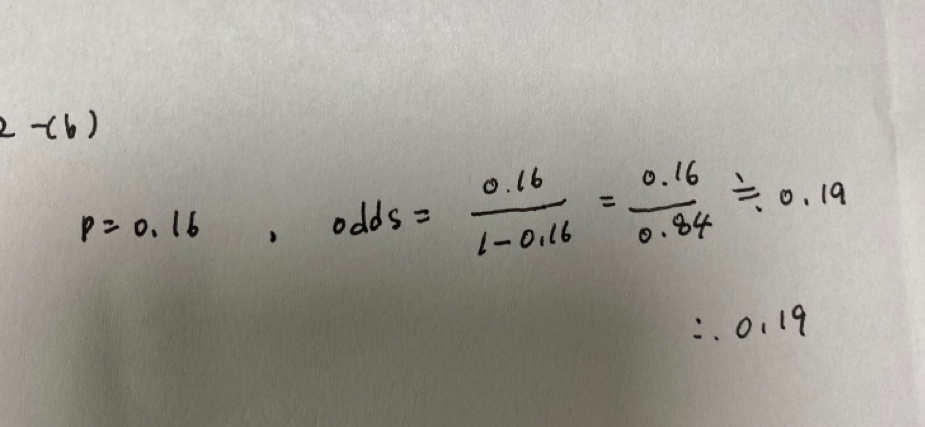

- odds 식에 p=0.16을 대입하면 된다. default할 확률이 16%인 개인이 default할 odds는 약 0.19이다.